In [1]:
import sys
import os

# Source: https://stackoverflow.com/questions/16780014/import-file-from-parent-directory
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__name__))))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from lusi.invariants.invariants import random_projection

In [2]:
def generate_sample(center_1, center_2, max_radius=1, n=100, seed=None):
    circles_1 = []
    circles_2 = []
    
    np.random.seed(seed)

    for _ in range(n):
        u = np.random.uniform()
        radius = max_radius * np.random.uniform()

        circles_1.append([
            center_1[0] + radius * np.cos(2 * np.pi * u),
            center_1[1] + radius * np.sin(2 * np.pi * u)
        ])
    
    for _ in range(n):
        u = np.random.uniform()
        radius = max_radius * np.random.uniform()

        circles_2.append([
            center_2[0] + radius * np.cos(2 * np.pi * u),
            center_2[1] + radius * np.sin(2 * np.pi * u)
        ])

    circles = np.array([*circles_1, *circles_2])
    labels = np.array([*[0] * n, *[1] * n])

    return circles, labels

In [3]:
center_1 = [1., 1.]
center_2 = [-1., -1.]

X, y = generate_sample(center_1, center_2, seed=37)

In [6]:
def plot_invariant(X, y, seed=47):
    np.random.seed(seed)
    
    figure = plt.figure(figsize=(18,5))
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    colors = {1: '#FF0000', 0: '#0000FF'}
    labels = np.unique(y)
    
    plt.subplot(1, 3, 1)
    plt.title('Original data')
    plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[0], label='0', edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[1], label='1', edgecolors='k')
    
    plt.legend()
    
    for i in range(2, 4):
        invariant = random_projection(X)
        y_vals = np.zeros_like(y)
        
        plt.subplot(1, 3, i)
        plt.title('Projected data')
        
        for lab in labels:
            lab_idx = lab == y
            plt.scatter(invariant[lab_idx], y_vals[lab_idx], c=colors[lab], label=f'{lab}', edgecolors='k')
        
        plt.legend()
    
    plt.savefig('random_projections_example.png')
    plt.show()

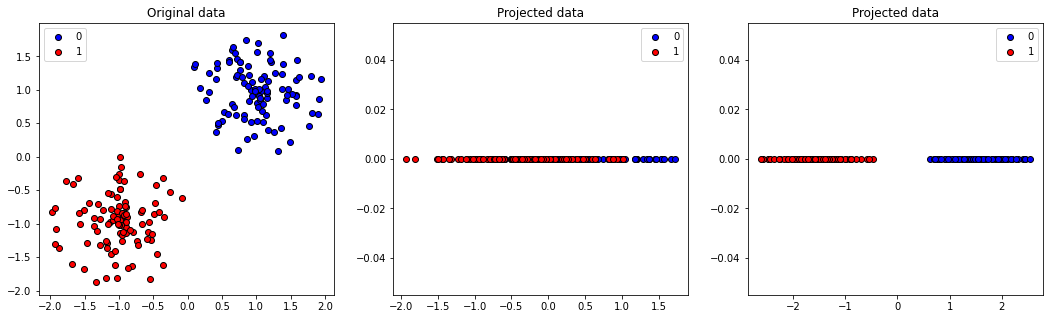

In [7]:
plot_invariant(X, y)